# UNDERSTANDING TRANSFER FUNCTIONS

In [50]:
import numpy as np
import tellurium as te
import control
import matplotlib.pyplot as plt
import sympy

In [55]:
CONSTANT = 10
CONSTANT2 = 2
TIMES = np.linspace(0, 5, 50)
s, k, k2 = sympy.symbols("s, k, k2")

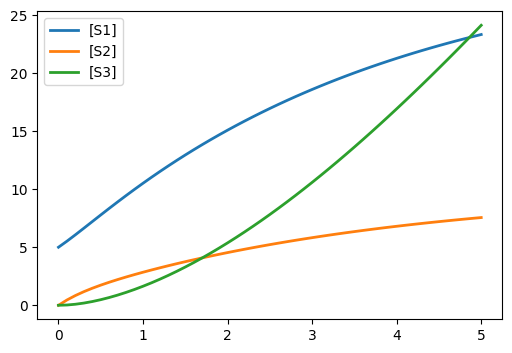

In [94]:
LINEAR2_MDL = """
J0:  -> S1; k
J1a: S2 -> S1; k2*S2
J1b: S1 -> S2; S1
J2: S2 -> S3; S2

k =10
k2 = 2
S1 = 5
S2 = 0
S3 = 0
"""
RR = te.loada(LINEAR2_MDL)
RR["k"] = CONSTANT
RR["k2"] = CONSTANT2
data = RR.simulate()
RR.plot()

\begin{eqnarray}
\dot{S}_1 & = & k - S_1 + k_2 S_2 \\
\dot{S}_2 & = & S_1 - (1 + k_2) S_2 \\
\dot{S}_3 & = & S_2 \\
\end{eqnarray}

\begin{eqnarray}
sS_1 (s) & = & k - S_1 (s) + k_2 S_2 (s) \\
s S_2 (s) & = & S_1 (s) - (1 + k_2)S_2 (s) \\
s S_3 (s) & = & S_2 (s) \\
\end{eqnarray}

\begin{eqnarray}
S_2(s) (s + 1 + k_2) & = & S_1 (s) \\
S_2 & = & \frac{S_1 (s)}{s + 1 + k_2} \\
\end{eqnarray}

\begin{eqnarray}
sS_1 (s) & = & k - S_1 (s) + k_2 \frac{S_1 (s)}{s + 1 + k_2} \\
S_1 ( s + 1 - \frac{k_2}{s + 1 + k_2} ) & = & k \\
S_1 ( \frac{(s + 1)(s + 1 + k_2) - k_2}{s + 1 + k_2} ) & = & k \\
\frac{S_1}{k} & = & \frac{s + 1 + k_2}  {(s + 1)(s + 1 + k_2) - k_2} \\
\frac{S_1}{k} & = & \frac{s + 1 + k_2}  {s^2 + (2 + k_2) s + 1} \\
\end{eqnarray}

In [53]:
sympy.expand((s + 1)*(s + 1 + k2) - k2)

k2*s + s**2 + 2*s + 1

In [86]:
tf = control.TransferFunction([1, 1+ CONSTANT2], [1, 2 + CONSTANT2, 1])
tf

TransferFunction(array([1, 3]), array([1, 4, 1]))

In [87]:
ss = control.tf2ss(tf)
ss

StateSpace(array([[-4., -1.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[1., 3.]]), array([[0.]]))

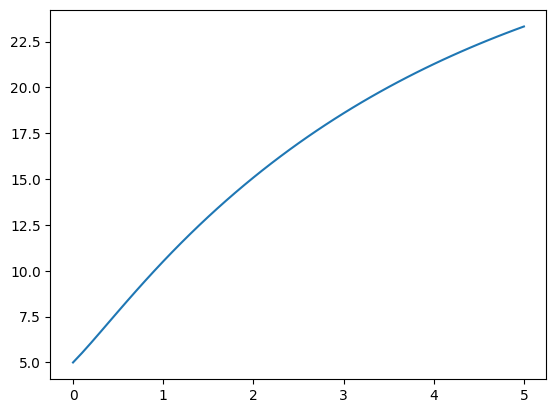

In [98]:
times = data["time"]
ss = control.tf2ss(tf)
X0 = np.array([0, 0])
X0 = np.reshape(X0, (2, 1))
#_, ys = control.step_response(ss, T=data["time"], X0=X0)
_, sys = control.step_response(tf, T=data["time"])
_, iys = control.impulse_response(tf, T=data["time"])
ys = sys*CONSTANT + 5*iys
plt.plot(times, ys)

Text(0, 0.5, 'tf')

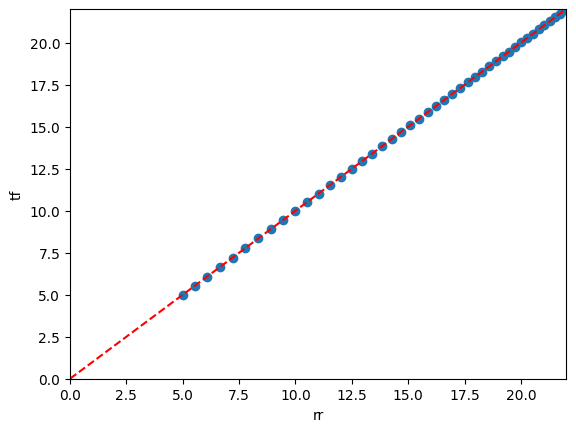

In [99]:
max_val = 22
plt.scatter(data["[S1]"], ys)
plt.xlim([0, max_val])
plt.ylim([0, max_val])
plt.plot([0, max_val], [0, max_val], color="red", linestyle="--")
plt.xlabel("rr")
plt.ylabel("tf")

In [6]:
tf = control.TransferFunction([CONSTANT], [1, CONSTANT])

TransferFunction(array([10]), array([ 1, 10]))

In [17]:
U = np.array([[0, CONSTANT] for _ in range(len(TIMES))])

In [25]:
tf = control.TransferFunction([1, 2, CONSTANT], [1, 2, 3, CONSTANT])
tf

TransferFunction(array([ 1,  2, 10]), array([ 1,  2,  3, 10]))

In [26]:
ss = control.tf2ss(tf)
ss

StateSpace(array([[ -2.,  -3., -10.],
       [  1.,   0.,   0.],
       [  0.,   1.,   0.]]), array([[1.],
       [0.],
       [0.]]), array([[ 1.,  2., 10.]]), array([[0.]]))

In [32]:
times, y = control.forced_response(ss, T=TIMES, U=1, X0=[)

array([ 0.        ,  0.10317438,  0.21233863,  0.33136632,  0.46204264,
        0.60429627,  0.75643275,  0.91537931,  1.07694642,  1.23610749,
        1.38729483,  1.52470711,  1.6426212 ,  1.73569938,  1.79928202,
        1.82965486,  1.82428032,  1.78198273,  1.70307851,  1.58944418,
        1.4445171 ,  1.27322633,  1.08185388,  0.8778295 ,  0.66946508,
        0.46563768,  0.27543257,  0.10776032, -0.02903689, -0.12757271,
       -0.18178097, -0.18723969, -0.14143903, -0.0439788 ,  0.10331641,
        0.29637316,  0.52894162,  0.79276575,  1.07784854,  1.372805  ,
        1.66529195,  1.94249924,  2.19168415,  2.40072767,  2.55868957,
        2.65633812,  2.68663028,  2.64511919,  2.53026792,  2.34365153])